## Predicting Financial Success of a Movie.

### Introduction

The uncertainty associated with the predictability of success of movie at box office have intrigued many industry leaders. In this we are trying to predict the movie category from flop to blockbuster based on other factors in a dataset. 

### Dataset

For this Hollywood Movies Financial Success Predictor Dataset was given, which consisted of Training Sheet and Scoring Sheet. Based on Training sheet, a predictor model is created. 

Dataset Consist of 1196 records and 15 columns. The purpose is to classify a category of movie from flop to blockbuster. There are 9 categories. This is the Multi-class classification problem.

I have analyzed dataset to find insights and performed data pre-processing and data cleaning. I have applied Decision Tree,Support Vector Machine Algorithm,K-NN, and Neural Network Algorithm.

After Applying Machine Learning Algorithm, I have calculated accuracy by using metrics:Recall, Precision,F-1 Score, and cross val score.


In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
#Reading Dataset

dataframe= pd.read_csv('Training sheet.csv')
dataframe.head()

,id,name,display_name,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,total,Category
0,7950115,Avatar,Avatar,2009,0,Science Fiction,Original Screenplay,Animation/Live Action,Action,English,"For intense epic battle sequences and warfare,...",PG-13,Wide,2784,9
1,,Harry Potter and the Deathly Hallows: Part II,Harry Potter and the Deathly Hallows: Part II,2011,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for some sequences of intense action violence ...,PG-13,Wide,1328,9
2,119870115,Transformers 3,Transformers: Dark of the Moon,2011,1,Science Fiction,Based on TV,Animation/Live Action,Action,English,for intense prolonged sequences of sci-fi acti...,PG-13,Wide,1124,9
3,119590115,Toy Story 3,Toy Story 3,2010,1,Kids Fiction,Original Screenplay,Digital Animation,Adventure,English,General,G,Wide,1064,9
4,91700115,Pirates of the Caribbean 4,Pirates of the Caribbean: On Stranger Tides,2011,1,Fantasy,Based on Theme Park Ride,Live Action,Adventure,English,for intense sequences of action/adventure viol...,PG-13,Wide,1044,9


In [3]:
#Finding Shape
dataframe.shape

(1196, 15)

In [4]:
#Identifying columns

dataframe.columns

Index(['id', 'name', 'display_name', 'production_year', 'movie_sequel',
       'creative_type', 'source', 'production_method', 'genre', 'language',
       'board_rating_reason', 'movie_board_rating_display_name',
       'movie_release_pattern_display_name', 'total', 'Category'],
      dtype='object')

In [5]:
# "ID" here is uniquely identifying each row in our database. 
# Also, name and display_name is similar and have same meaning.
# There is no significance of these values for our analysis as they are just an identifier for a row .
# So we are dropping "name", "display_name" and "id" attribute.

df = dataframe.drop(columns = ['id', 'name', 'display_name'])
df.head()

,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,total,Category
0,2009,0,Science Fiction,Original Screenplay,Animation/Live Action,Action,English,"For intense epic battle sequences and warfare,...",PG-13,Wide,2784,9
1,2011,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for some sequences of intense action violence ...,PG-13,Wide,1328,9
2,2011,1,Science Fiction,Based on TV,Animation/Live Action,Action,English,for intense prolonged sequences of sci-fi acti...,PG-13,Wide,1124,9
3,2010,1,Kids Fiction,Original Screenplay,Digital Animation,Adventure,English,General,G,Wide,1064,9
4,2011,1,Fantasy,Based on Theme Park Ride,Live Action,Adventure,English,for intense sequences of action/adventure viol...,PG-13,Wide,1044,9


In [6]:
#Shape of data set

df.shape

(1196, 12)

In [7]:
#information of data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 12 columns):
production_year                       1196 non-null int64
movie_sequel                          1196 non-null int64
creative_type                         1196 non-null object
source                                1196 non-null object
production_method                     1196 non-null object
genre                                 1196 non-null object
language                              1196 non-null object
board_rating_reason                   1196 non-null object
movie_board_rating_display_name       1196 non-null object
movie_release_pattern_display_name    1196 non-null object
total                                 1196 non-null int64
Category                              1196 non-null int64
dtypes: int64(4), object(8)
memory usage: 112.2+ KB


The above set of information showcase following things:

1. Column names are consistent.
2. For each column , there are 1196 records, this shows that rows are consistent.

In [8]:
##Finding inconsistent values

df.isna().sum()


production_year                       0
movie_sequel                          0
creative_type                         0
source                                0
production_method                     0
genre                                 0
language                              0
board_rating_reason                   0
movie_board_rating_display_name       0
movie_release_pattern_display_name    0
total                                 0
Category                              0
dtype: int64

Text(0.5, 1.0, 'Null Values')

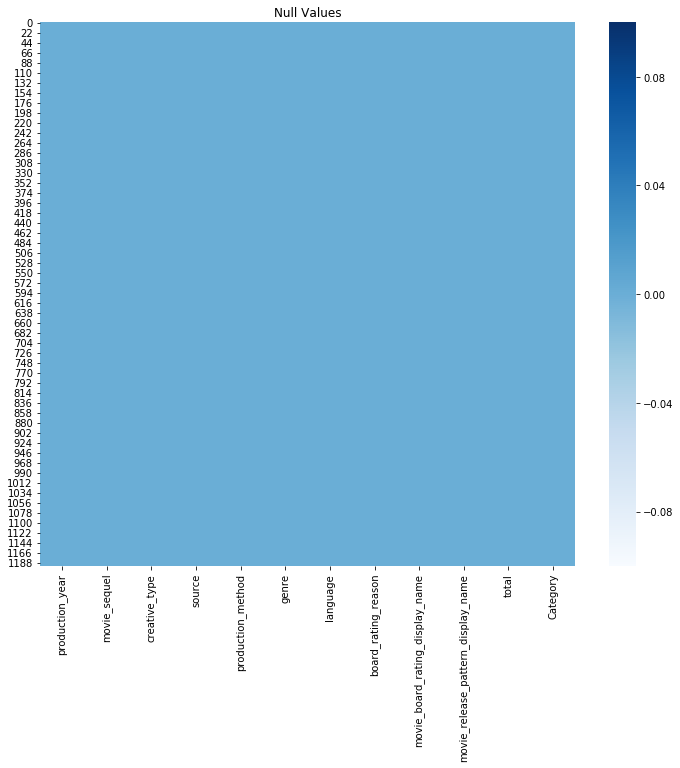

In [9]:
#Graphical visualization of missing values

plt.figure(figsize=(12,10))
ax = plt.axes()

sb.heatmap(df.isnull(),cmap = "Blues")

ax.set_title("Null Values")


In [10]:
#Finding Duplicate values

df.duplicated().sum()

1

#### Data Cleaning

The above code showcase there is no missing or inconsistent values. There are 13 duplicate values. We need to delete this duplicate values.


In [11]:
### Deleting duplicate values
df.drop_duplicates()

df.head()

,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,total,Category
0,2009,0,Science Fiction,Original Screenplay,Animation/Live Action,Action,English,"For intense epic battle sequences and warfare,...",PG-13,Wide,2784,9
1,2011,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for some sequences of intense action violence ...,PG-13,Wide,1328,9
2,2011,1,Science Fiction,Based on TV,Animation/Live Action,Action,English,for intense prolonged sequences of sci-fi acti...,PG-13,Wide,1124,9
3,2010,1,Kids Fiction,Original Screenplay,Digital Animation,Adventure,English,General,G,Wide,1064,9
4,2011,1,Fantasy,Based on Theme Park Ride,Live Action,Adventure,English,for intense sequences of action/adventure viol...,PG-13,Wide,1044,9


### Data Pre-Processing (Data Conversion)

As we know that Machine Learning model can only handle numerical features, so LabelEncoder, an in-built algorithm is used to convert categorical features into numerical features.


In [12]:
# Converting Categorical feature into numerical feature by using LabelEncoder

data_holly = df.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

data_holly['creative_type'] = lb_make.fit_transform(data_holly['creative_type'])
data_holly['source'] = lb_make.fit_transform(data_holly['source'])
data_holly['production_method'] = lb_make.fit_transform(data_holly['production_method'])
data_holly['genre'] = lb_make.fit_transform(data_holly['genre'])
data_holly['language'] = lb_make.fit_transform(data_holly['language'])
data_holly['movie_board_rating_display_name'] = lb_make.fit_transform(data_holly['movie_board_rating_display_name'])
data_holly['movie_release_pattern_display_name'] = lb_make.fit_transform(data_holly['movie_release_pattern_display_name'])

data_holly.head()

,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,total,Category
0,2009,0,7,13,0,0,2,"For intense epic battle sequences and warfare,...",4,6,2784,9
1,2011,1,3,2,0,1,2,for some sequences of intense action violence ...,4,6,1328,9
2,2011,1,7,9,0,0,2,for intense prolonged sequences of sci-fi acti...,4,6,1124,9
3,2010,1,5,13,1,1,2,General,0,6,1064,9
4,2011,1,3,10,3,1,2,for intense sequences of action/adventure viol...,4,6,1044,9


#### Converting text field into categories of sentiments.

board_rating_reason is a text field in which rating reason is given. This is a subjective field. By using Natural Language Processing, I am going to identify the sentiment of the text and rank from positive to negative rection. The order from positive to negative is classified from 1 to 5.

1 -> Very positive 
2 -> positive
3 -> neutral
4 -> negative
5 -> very negative

After converting the rating reason to these numericalfeature, we will apply machine learning algorithms to see impact of this on target variable.

In [13]:
#Converting text feature into numerical feature
from textblob import TextBlob

reviews = data_holly.iloc[:,7]

i=0;

for review in reviews:
    text = TextBlob(review)
    polarity=text.sentiment.polarity
    
    #positive to negative reaction (classification goes from 1 to 5)
    if polarity>0.5 and polarity<1.0:
        data_holly.loc[i,'board_rating_reason'] = 1
    elif polarity>0.2 and polarity<0.5:
        data_holly.loc[i,'board_rating_reason'] = 2
    elif polarity>0.0 and polarity<0.2:
        data_holly.loc[i,'board_rating_reason'] = 3
    elif polarity>-0.05 and polarity<-0.1:
        data_holly.loc[i,'board_rating_reason'] = 5
    else:
        data_holly.loc[i,'board_rating_reason'] = 4
    
    i = i+1

    
data_holly.head()

,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,total,Category
0,2009,0,7,13,0,0,2,3,4,6,2784,9
1,2011,1,3,2,0,1,2,4,4,6,1328,9
2,2011,1,7,9,0,0,2,3,4,6,1124,9
3,2010,1,5,13,1,1,2,3,0,6,1064,9
4,2011,1,3,10,3,1,2,4,4,6,1044,9


In [14]:
# Finding out Summary Statistics of dataset to know more about features of dataset.

data_holly.describe()

,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,total,Category
count,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000
mean,2008.984950,0.097826,1.764214,9.345318,2.826923,5.135452,2.229933,3.460702,3.945652,4.887124,104.703177,3.564381
std,1.383625,0.297204,2.359262,4.854570,0.665449,3.403672,1.339384,0.737037,1.160532,1.652629,181.927715,1.962417
min,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000
25%,2008.000000,0.000000,0.000000,5.750000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,11.000000,2.000000
50%,2009.000000,0.000000,0.000000,13.000000,3.000000,6.000000,2.000000,4.000000,4.000000,6.000000,40.500000,3.000000
75%,2010.000000,0.000000,3.000000,13.000000,3.000000,7.000000,2.000000,4.000000,5.000000,6.000000,114.250000,5.000000
max,2011.000000,1.000000,8.000000,15.000000,5.000000,12.000000,15.000000,4.000000,5.000000,6.000000,2784.000000,9.000000


### Distribution of Data

Text(0.5, 1.0, 'Distribution of Data')

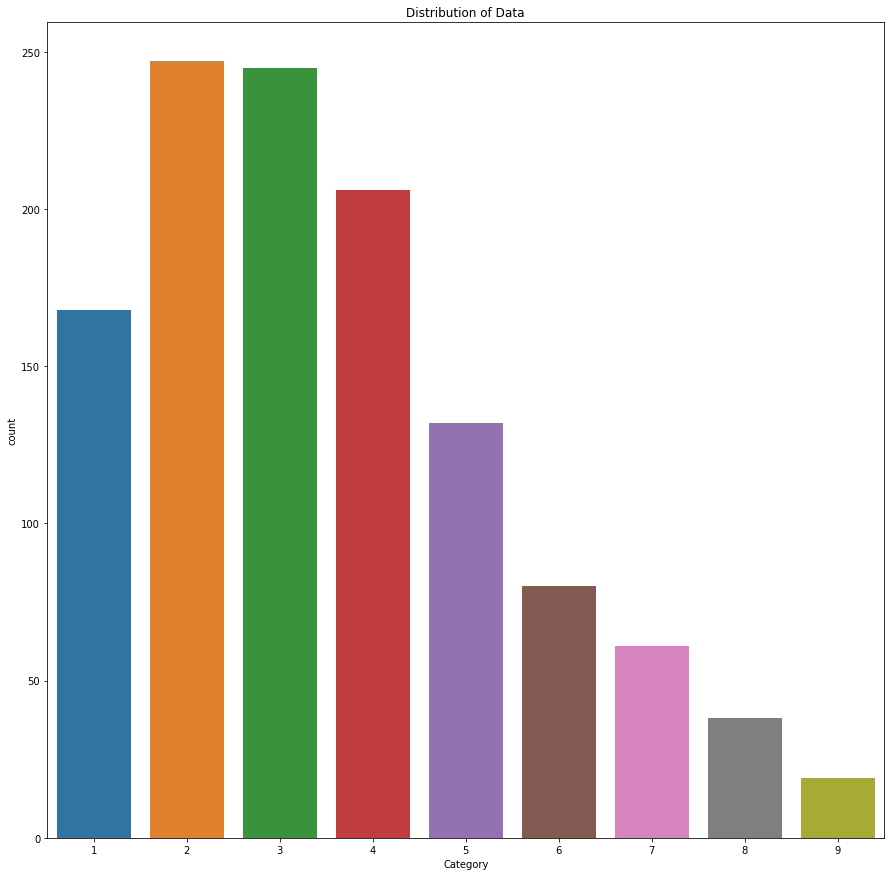

In [15]:
plt.figure(figsize=(15,15))

sb.countplot(x='Category',data=data_holly)

plt.title('Distribution of Data')

The above graph showcases, the count of movies for each category in a dataset. We can see that data points for class 2,3,4 is  much more than 7, 8 , 9. This showcases that data points for class 7,8,9 are underrepresented and learning from such data is biased towards majority class. To proceed furthur with classification algorithm, we have to first deal with this imbalanced data.

The imbalanced data is handeled by doing resampling (balancing the data). We will perform "smote" resampling to balance the dataset before we can apply Machine Learning Algorithms. 

### Balancing Imbalanced data

In [16]:
# Predictor X: create from data with all the columns except the last column (category)

X = data_holly.iloc[:,0:11]
X.head()


,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,total
0,2009,0,7,13,0,0,2,3,4,6,2784
1,2011,1,3,2,0,1,2,4,4,6,1328
2,2011,1,7,9,0,0,2,3,4,6,1124
3,2010,1,5,13,1,1,2,3,0,6,1064
4,2011,1,3,10,3,1,2,4,4,6,1044


In [17]:
# Target varable Y:create from data with last column

y = data_holly.iloc[:,11]

y.head()

0    9
1    9
2    9
3    9
4    9
Name: Category, dtype: int64

In [18]:
#Handling Imbalance data
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_smote,y_smote = sm.fit_resample(X,y)



Using TensorFlow backend.


In [19]:
#Converting Dataframe

X_data_frame_smote = pd.DataFrame(X_smote) 

#Renaming columns for dataframe

X_df_smote = X_data_frame_smote.rename(columns={0:'production_year', 1:'movie_sequel',2:'creative_type',3:'source',4:'production_method',
                                   5:'genre',6:'language',7:'board_rating_reason',8:'movie_board_rating_display_name',
                                   9:'movie_release_pattern_display_name',10:'total'})

X_df_smote.head()



,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,total
0,2009,0,7,13,0,0,2,3,4,6,2784
1,2011,1,3,2,0,1,2,4,4,6,1328
2,2011,1,7,9,0,0,2,3,4,6,1124
3,2010,1,5,13,1,1,2,3,0,6,1064
4,2011,1,3,10,3,1,2,4,4,6,1044


In [20]:
#Converting in Dataframe
y_data_frame_smote = pd.DataFrame(y_smote)

y_data_frame_smote.columns = ["Category"]

print(y_data_frame_smote)


      Category
0            9
1            9
2            9
3            9
4            9
5            9
6            9
7            9
8            9
9            9
10           9
11           9
12           9
13           9
14           9
15           9
16           9
17           9
18           9
19           8
20           8
21           8
22           8
23           8
24           8
25           8
26           8
27           8
28           8
29           8
...        ...
2193         9
2194         9
2195         9
2196         9
2197         9
2198         9
2199         9
2200         9
2201         9
2202         9
2203         9
2204         9
2205         9
2206         9
2207         9
2208         9
2209         9
2210         9
2211         9
2212         9
2213         9
2214         9
2215         9
2216         9
2217         9
2218         9
2219         9
2220         9
2221         9
2222         9

[2223 rows x 1 columns]


In [21]:
y_data_frame_smote.shape

(2223, 1)

Text(0.5, 1.0, 'Distribution of Data')

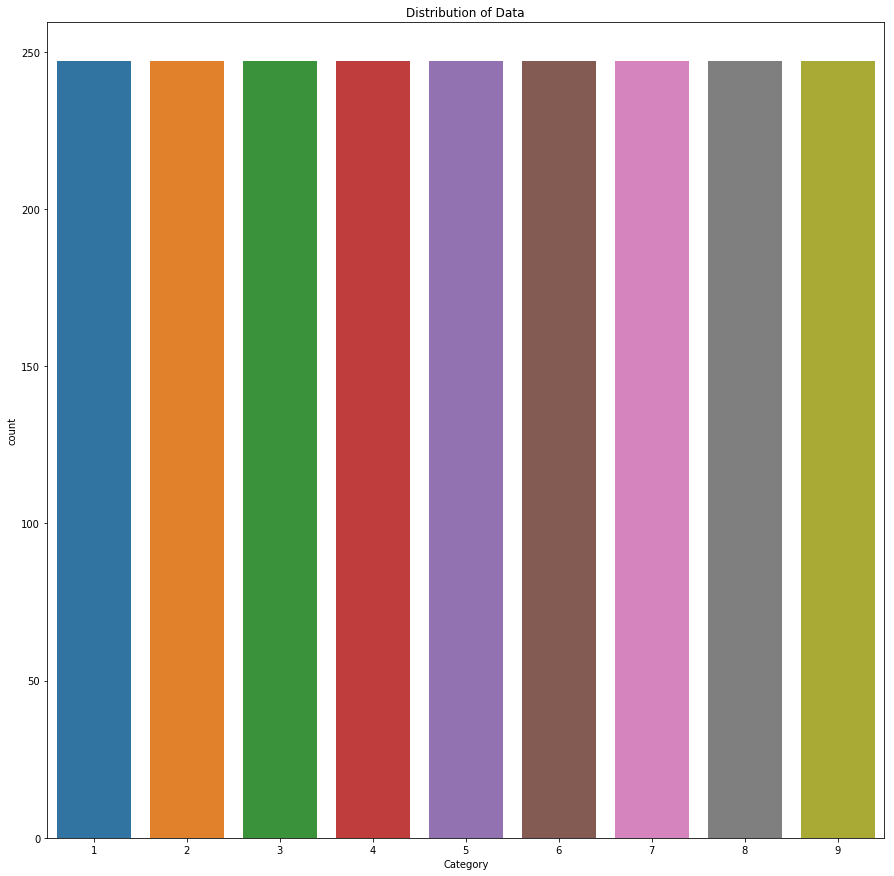

In [22]:
plt.figure(figsize=(15,15))

sb.countplot(x='Category',data=y_data_frame_smote)

plt.title('Distribution of Data')

In [23]:
### Since "total" field is not included in a scoring sheet which is an input to our predictive model, 
### so dropping total field 

X_data_frame_smote = X_df_smote.drop(columns = ['total'])
data_holly = data_holly.drop(columns = ['total'])

X_data_frame_smote.head()

,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name
0,2009,0,7,13,0,0,2,3,4,6
1,2011,1,3,2,0,1,2,4,4,6
2,2011,1,7,9,0,0,2,3,4,6
3,2010,1,5,13,1,1,2,3,0,6
4,2011,1,3,10,3,1,2,4,4,6


## Exploratory Data Analysis

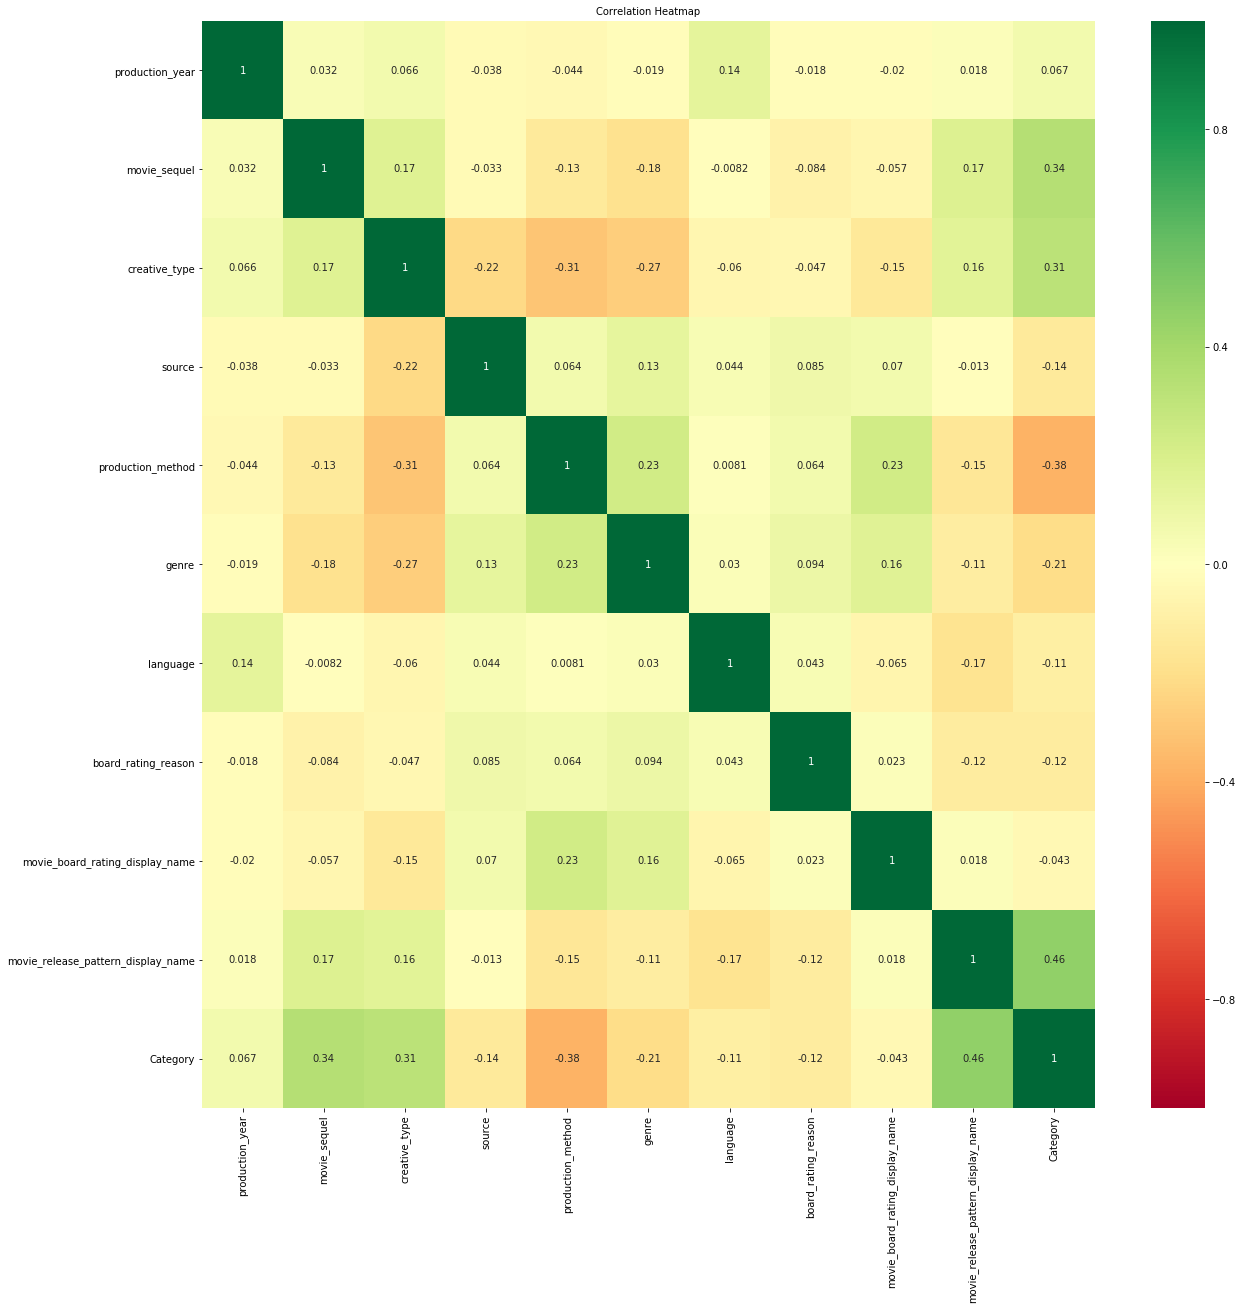

In [24]:
#Correlation Heatmap displaying correlation between predictor variables and target variables.

plt.figure(figsize=(20,20))
corr = data_holly.corr()
sb.heatmap(corr, annot = True, cmap='RdYlGn', vmin = -1, vmax = 1)
plt.title("Correlation Heatmap", fontsize=10)
plt.show()   

From above correlation heatmap we can see that, movie sequeal,creative type, and movie release patern display name is directly impacting the category and is highly correlated. 

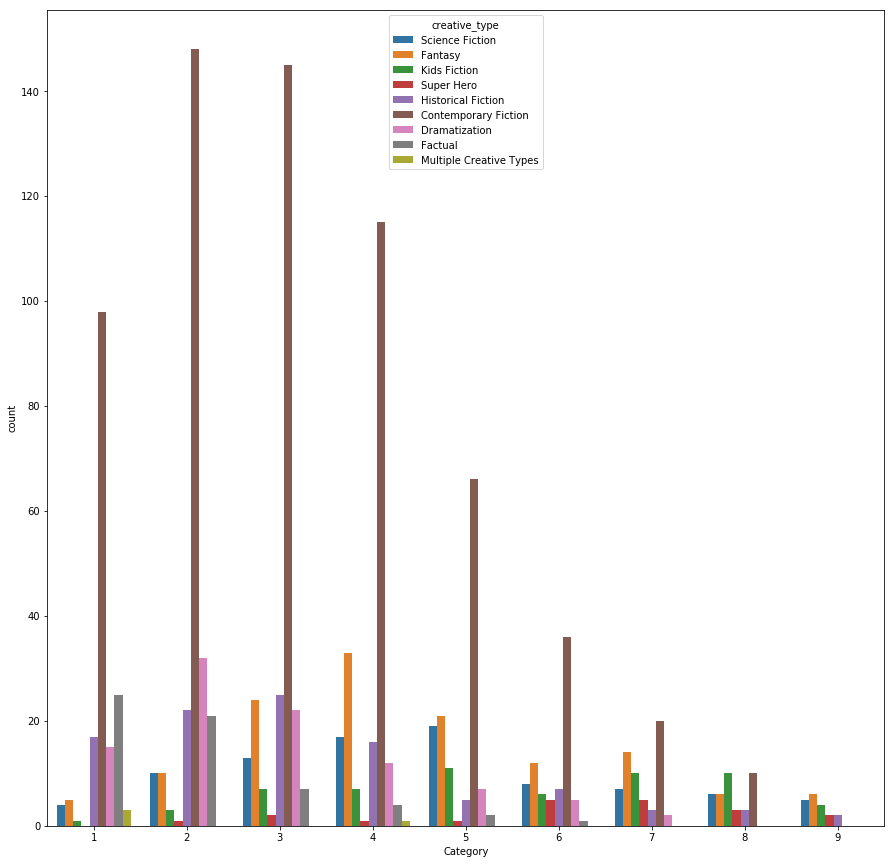

In [25]:
plt.figure(figsize=(15,15))

sb.countplot(x='Category',data=df, hue = 'creative_type')

From above graph, we can conclude that contemporary fiction doesnot do well on box office.

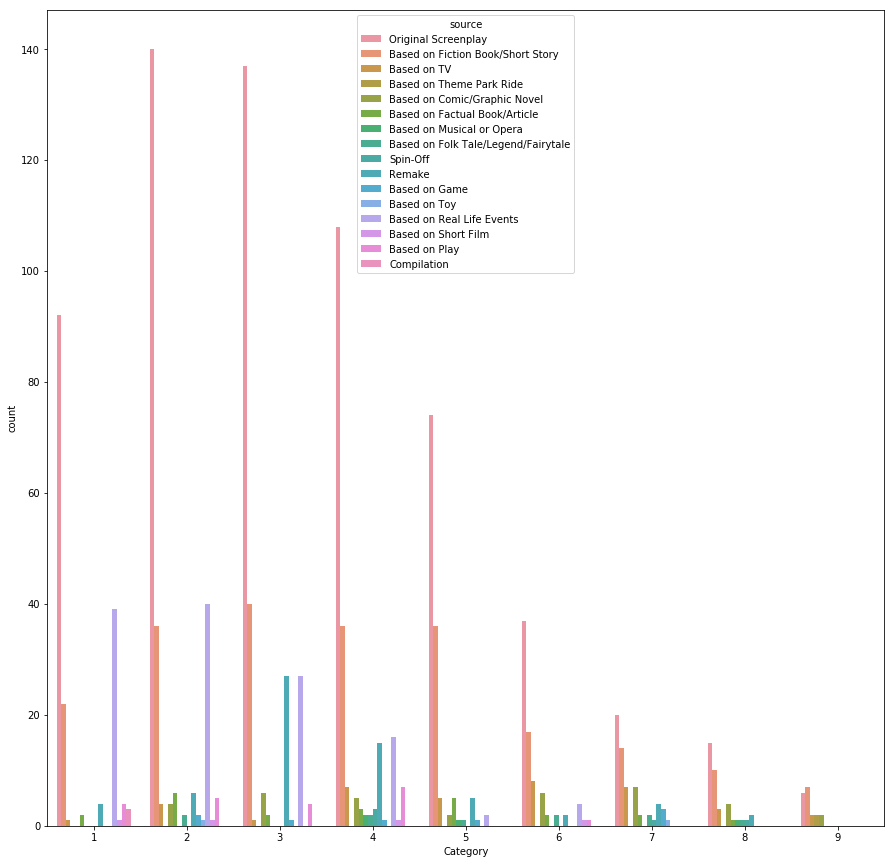

In [26]:
plt.figure(figsize=(15,15))

sb.countplot(x='Category',data=df, hue = 'source')

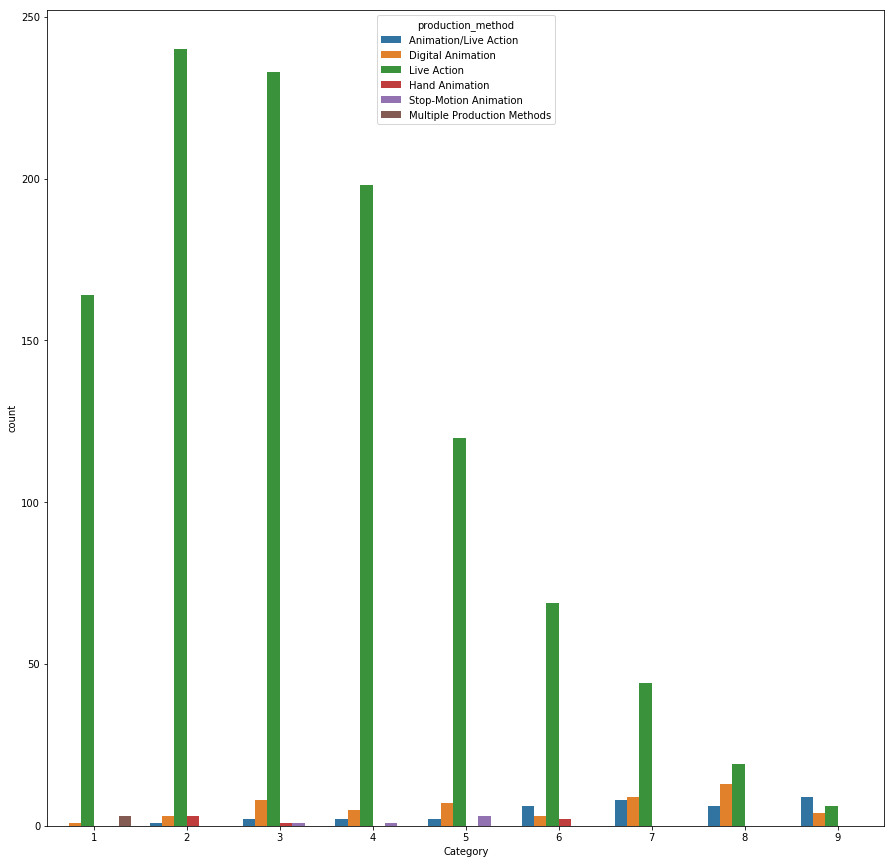

In [27]:
plt.figure(figsize=(15,15))

sb.countplot(x='Category',data=df, hue = 'production_method')

Animation/Live Action Movies does well in business.

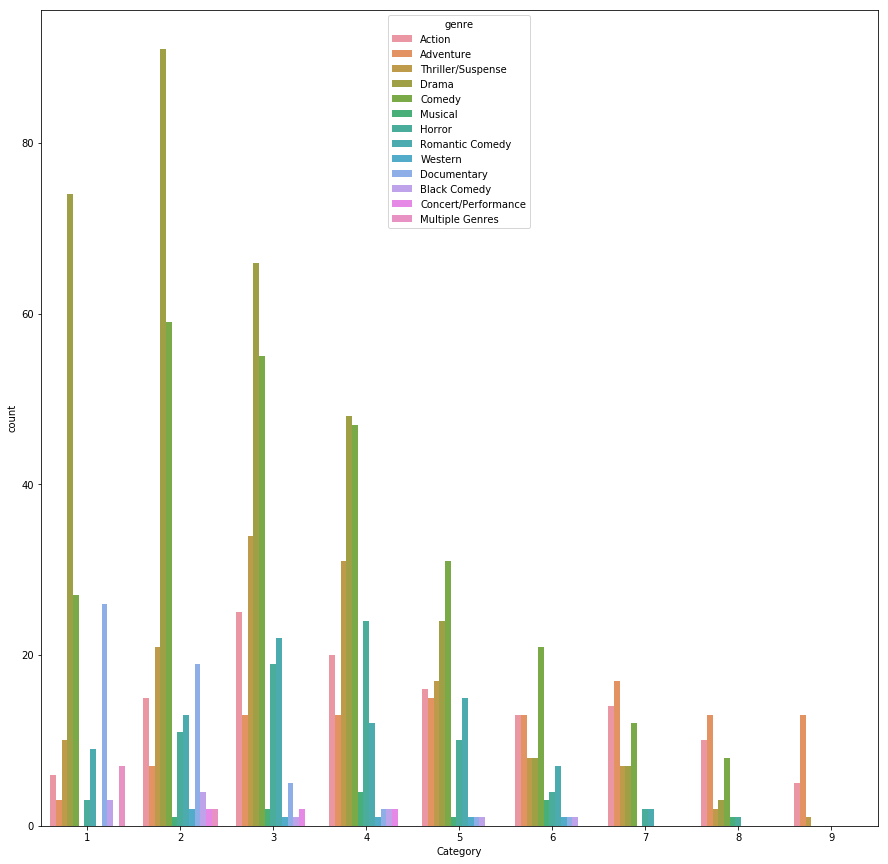

In [28]:
plt.figure(figsize=(15,15))

sb.countplot(x='Category',data=df, hue = 'genre')

From above visualizaton, we can say that adventure genre movies do well in business.

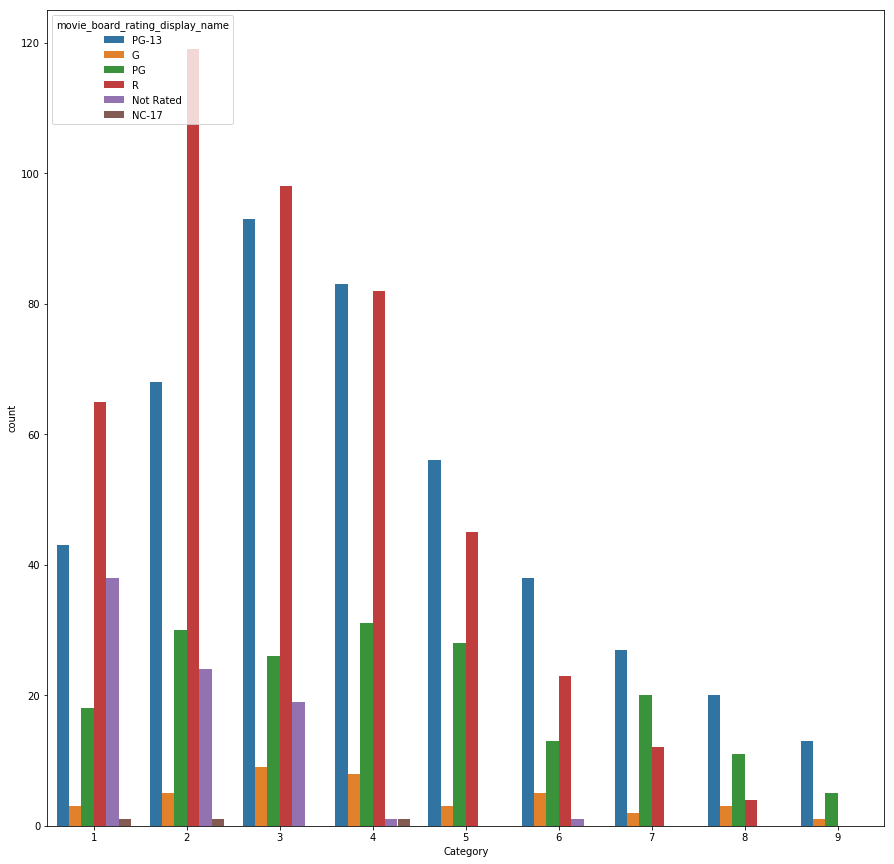

In [29]:
plt.figure(figsize=(15,15))

sb.countplot(x='Category',data=df, hue = 'movie_board_rating_display_name')

From above visualization, we can say that movie with "R" Category doesnot do well in business.

### Training and Testing Data

After balancing the data,X_smote and y_smote is used to create training and testing data.

In [30]:
#Create Training and Testing data: X_train, X_test, y_train, y_test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data_frame_smote, y_data_frame_smote, random_state=0)

In [31]:
X_train.head()

,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name
1349,2007,1,7,13,3,0,2,3,5,6
717,2011,1,3,14,3,7,2,4,5,6
1510,2008,0,2,13,3,6,2,2,5,6
1073,2011,0,2,7,3,5,2,3,4,3
1106,2007,0,0,13,3,2,2,4,5,6


In [32]:
# print out the shape of X_train, y_train, 

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

# print out the shape of X_test, X_test, 

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (1667, 10)
y_train shape: (1667, 1)
X_test shape: (556, 10)
y_test shape: (556, 1)


### Building Model

Recall , Precision , and F1 Score are the best method for finding accuracy for multi-class classification problem with imbalanced data, as it gives accuracy for each category.

In [33]:
#Importing Libraries for Evaluation Metrics

#Importing Accuracy Score
from sklearn.metrics import accuracy_score

#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix

#Importing Recall Score
from sklearn.metrics import recall_score

#Importing Precision Score
from sklearn.metrics import precision_score

#Importing F1 Score
from sklearn.metrics import f1_score

#Importing cross_val_score



In [34]:
#List of model predicted values
Models = list()
Models

[]

#### Decision Tree

In [35]:
# Import decision tree
from sklearn.tree import DecisionTreeClassifier

# Build a decision tree model
dtree = DecisionTreeClassifier()

# Train the model
dtree = dtree.fit(X_train, y_train)

#Predicting ourtcome on dataset

y_pred_dtree = dtree.predict(X_test)

Models.append(y_pred_dtree)




#### Evaluation Metrics for Decision Tree

In [36]:
#Accuracy score
accuracy_score(y_test,y_pred_dtree)


0.4316546762589928

[[33 15  6  1  2  2  1  1  0]
 [14 14  8  7  5  2  0  2  0]
 [10 15  8 14  7  5  3  6  0]
 [ 8  6 17 12  8  5  6  1  0]
 [ 3 14  6  8 17  8  7  3  4]
 [ 2  4  2  6  7 28  8  4  1]
 [ 1  3  1  4  2  3 31  3  1]
 [ 1  1  2  0  3  3  8 44  4]
 [ 0  2  0  0  2  4  2  2 53]]


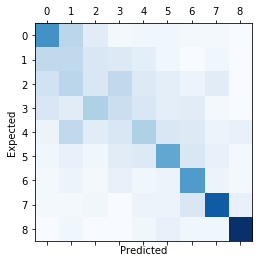

In [37]:
#Confusion Matrix

cm = confusion_matrix(y_test,y_pred_dtree)
print(cm)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [38]:
#Recall_score

recall_score(y_test,y_pred_dtree, average = None)

array([0.54098361, 0.26923077, 0.11764706, 0.19047619, 0.24285714,
       0.4516129 , 0.63265306, 0.66666667, 0.81538462])

In [39]:
#precision Score

precision_score(y_test,y_pred_dtree, average = None)

array([0.45833333, 0.18918919, 0.16      , 0.23076923, 0.32075472,
       0.46666667, 0.46969697, 0.66666667, 0.84126984])

In [40]:
#F1 Score

f1_score_dtree = f1_score(y_test,y_pred_dtree, average = 'weighted')
print(f1_score_dtree)


0.4249074163867224


In [41]:
#cross_val_score

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dtree,X_data_frame_smote,y_data_frame_smote, cv=5)
score_mean_dtree = scores.mean()
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.46 (+/- 0.09)


In [42]:
#Support Vector Machine
from sklearn.svm import SVC

# Build a decision tree model
svm = SVC()

# Train the model
svm = svm.fit(X_train, y_train)

#Predicting ourtcome on dataset

y_pred_svm = dtree.predict(X_test)

Models.append(y_pred_svm)





C:\Users\shree\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shree\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### Evaluation Metrics for support vector machine

In [43]:
#Accuracy score
accuracy_score(y_test,y_pred_svm)

0.4316546762589928

[[33 15  6  1  2  2  1  1  0]
 [14 14  8  7  5  2  0  2  0]
 [10 15  8 14  7  5  3  6  0]
 [ 8  6 17 12  8  5  6  1  0]
 [ 3 14  6  8 17  8  7  3  4]
 [ 2  4  2  6  7 28  8  4  1]
 [ 1  3  1  4  2  3 31  3  1]
 [ 1  1  2  0  3  3  8 44  4]
 [ 0  2  0  0  2  4  2  2 53]]


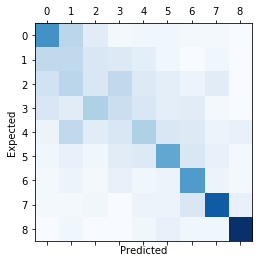

In [44]:
#Confusion Matrix

cm = confusion_matrix(y_test,y_pred_svm)
print(cm)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [45]:
#Recall_score

recall_score(y_test,y_pred_svm, average = None)

array([0.54098361, 0.26923077, 0.11764706, 0.19047619, 0.24285714,
       0.4516129 , 0.63265306, 0.66666667, 0.81538462])

In [46]:
#precision Score

precision_score(y_test,y_pred_svm, average = None)

array([0.45833333, 0.18918919, 0.16      , 0.23076923, 0.32075472,
       0.46666667, 0.46969697, 0.66666667, 0.84126984])

In [47]:
#F1 Score

f1_score_svm = f1_score(y_test,y_pred_svm, average = 'weighted')
print(f1_score_svm)

0.4249074163867224


In [48]:
#cross_val_score

from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm,X_data_frame_smote,y_data_frame_smote, cv=5)
score_mean_svm = scores.mean()
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

C:\Users\shree\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shree\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\shree\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shree\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to

Accuracy: 0.45 (+/- 0.07)


C:\Users\shree\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shree\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [49]:
#K Neighbor Classifier

from sklearn.neighbors import KNeighborsClassifier

#Build a KNeighborsClassifier
kN=KNeighborsClassifier()

#Train a Model
kN.fit(X_train, y_train)

#Predicting outcome on dataset
y_pred_KN = kN.predict(X_test)

Models.append(y_pred_KN)

print(y_pred_KN)

[5 7 3 1 6 1 9 7 8 1 7 4 1 3 6 5 1 3 6 2 4 7 7 8 3 4 6 3 8 8 2 1 1 5 2 6 1
 9 8 7 1 8 7 3 9 5 6 9 8 5 3 3 6 7 5 2 7 1 1 1 3 4 4 2 2 1 3 2 4 2 8 7 2 5
 9 2 2 3 9 8 4 1 3 1 9 9 6 1 5 3 2 1 6 4 1 8 1 5 6 7 6 3 2 9 4 7 9 2 5 8 3
 9 1 2 6 2 9 3 6 3 6 3 9 2 2 6 3 7 6 4 7 8 2 1 8 5 2 5 4 1 1 3 2 4 2 1 1 8
 6 9 7 8 8 4 3 5 8 8 1 1 6 1 2 5 6 9 9 9 5 6 9 1 2 9 3 7 7 1 1 4 5 7 2 8 9
 9 4 5 2 8 2 7 6 6 5 7 2 1 5 1 1 2 7 1 5 8 3 7 1 9 8 8 8 5 4 6 4 9 8 5 3 4
 6 9 1 6 6 9 1 3 3 5 2 2 2 9 2 9 2 4 1 1 1 8 1 2 3 7 6 4 4 5 8 6 1 7 1 3 7
 5 7 2 8 6 1 8 9 6 1 8 7 1 7 4 2 7 9 5 1 2 9 2 9 2 3 6 4 9 5 9 5 9 7 5 8 9
 4 9 4 7 1 5 7 4 2 5 8 4 2 9 8 8 4 4 7 1 1 1 8 5 9 8 3 5 8 2 8 8 9 7 3 6 1
 7 9 2 1 1 3 4 4 2 4 5 9 7 5 2 2 7 6 1 4 1 7 8 6 5 2 7 9 7 6 5 9 2 2 9 5 4
 1 1 7 5 7 8 8 6 9 9 7 1 3 6 4 1 5 4 1 8 7 3 7 9 6 9 2 5 8 8 3 6 6 5 4 1 7
 2 8 2 6 9 1 9 4 3 5 7 2 5 7 9 5 2 6 3 9 6 5 2 1 3 4 1 5 9 4 1 2 5 6 7 9 9
 9 9 9 7 1 1 9 4 5 8 9 1 9 5 8 7 4 5 2 5 3 4 9 1 1 9 7 5 8 4 4 1 1 3 6 3 3
 6 2 1 8 9 4 8 2 4 7 5 2 

C:\Users\shree\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


#### Evaluation Metrics for K Neighbor classifier

In [50]:
#Accuracy score
accuracy_score(y_test,y_pred_KN)

0.41906474820143885

[[40 12  1  0  3  4  0  0  1]
 [19 12  6  6  4  3  1  0  1]
 [17 11  6 13  9  5  4  2  1]
 [10  9 15 12  8  3  3  2  1]
 [ 3 12  8  7 22  3  4  6  5]
 [ 1  5  1  9  7 26  6  4  3]
 [ 1  3  2  3  5  5 23  6  1]
 [ 0  2  4  3  1  3 13 37  3]
 [ 0  1  0  0  2  1  3  3 55]]


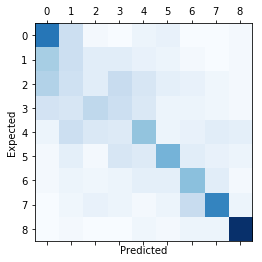

In [51]:
#Confusion Matrix

cm = confusion_matrix(y_test,y_pred_KN)
print(cm)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [52]:
#Recall_score

recall_score(y_test,y_pred_KN, average = None)

array([0.6557377 , 0.23076923, 0.08823529, 0.19047619, 0.31428571,
       0.41935484, 0.46938776, 0.56060606, 0.84615385])

In [53]:
#precision Score

precision_score(y_test,y_pred_KN, average = None)

array([0.43956044, 0.17910448, 0.13953488, 0.22641509, 0.36065574,
       0.49056604, 0.40350877, 0.61666667, 0.77464789])

In [54]:
#F1 Score

f1_score_KN = f1_score(y_test,y_pred_KN, average = 'weighted')
print(f1_score_KN)

0.40849696103109834


In [55]:
#cross_val_score

from sklearn.model_selection import cross_val_score

scores = cross_val_score(kN,X_data_frame_smote,y_data_frame_smote, cv=5)
score_mean_kN=scores.mean()
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.43 (+/- 0.04)


C:\Users\shree\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\shree\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\shree\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\shree\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y

#### Multi Layer Perceptron

In [56]:
##Importing Multi Layer Perceptron Classifier
from sklearn.neural_network import MLPClassifier

#Build a Multi Layer Perceptron Model
mlp = MLPClassifier()

#Train the Model
mlp.fit(X_train,y_train)

#Predicting Outcome on Dataset
y_pred_mlp = mlp.predict(X_test)

Models.append(y_pred_mlp)


C:\Users\shree\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Evaluation Metrics for Multi Layer Perceptron

In [57]:
#Accuracy score
accuracy_score(y_test,y_pred_mlp)

0.22302158273381295

[[ 0  5  0 34  4  1  0 10  7]
 [ 0  3  0 34  0  0  0 12  3]
 [ 0  3  0 37  4  0  0 16  8]
 [ 0  0  0 43  1  0  0  8 11]
 [ 0  1  0 38  2  0  0 10 19]
 [ 0  1  0 33  0  0  0 17 11]
 [ 0  0  0 10  1  0  0 17 21]
 [ 0  0  0  2  2  0  0 33 29]
 [ 0  0  0  0  5  0  0 17 43]]


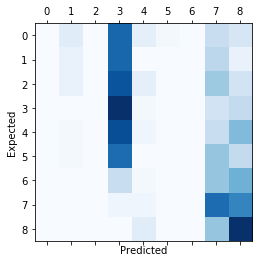

In [58]:
#Confusion Matrix

cm = confusion_matrix(y_test,y_pred_mlp)
print(cm)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()


In [59]:
#Recall_score

recall_score(y_test,y_pred_mlp, average = None)

array([0.        , 0.05769231, 0.        , 0.68253968, 0.02857143,
       0.        , 0.        , 0.5       , 0.66153846])

In [60]:
#precision Score

precision_score(y_test,y_pred_mlp, average = None)

C:\Users\shree\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.        , 0.23076923, 0.        , 0.18614719, 0.10526316,
       0.        , 0.        , 0.23571429, 0.28289474])

In [61]:
#f1 Score

f1_score_mlp= f1_score(y_test,y_pred_mlp, average = 'weighted')

print(f1_score_mlp)

0.13179970966880827


C:\Users\shree\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [62]:
#cross_val_score

scores = cross_val_score(mlp,X_data_frame_smote,y_data_frame_smote, cv=5)
score_mean_mlp = scores.mean()
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))




C:\Users\shree\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shree\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shree\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shree\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was pass

Accuracy: 0.17 (+/- 0.09)


C:\Users\shree\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
print(Models)

[array([5, 2, 3, 1, 6, 1, 9, 9, 9, 3, 7, 2, 2, 4, 6, 1, 1, 3, 3, 2, 6, 6,
       8, 8, 6, 4, 1, 3, 8, 8, 1, 1, 2, 5, 2, 6, 1, 7, 8, 7, 1, 8, 5, 2,
       9, 4, 4, 7, 8, 5, 6, 3, 3, 7, 5, 5, 7, 8, 1, 1, 3, 9, 4, 2, 7, 3,
       3, 2, 3, 2, 8, 7, 5, 5, 9, 2, 2, 7, 9, 8, 6, 1, 4, 2, 9, 9, 6, 5,
       5, 2, 4, 3, 7, 5, 1, 7, 1, 4, 2, 8, 6, 6, 2, 9, 4, 8, 9, 4, 9, 6,
       2, 9, 3, 2, 8, 1, 9, 3, 6, 3, 6, 3, 5, 2, 4, 6, 8, 7, 6, 4, 8, 8,
       2, 1, 8, 4, 7, 5, 6, 1, 2, 1, 8, 3, 2, 1, 1, 8, 6, 6, 9, 6, 8, 7,
       7, 3, 8, 9, 1, 1, 5, 3, 7, 1, 6, 8, 6, 9, 5, 3, 6, 1, 2, 9, 6, 7,
       7, 1, 1, 5, 5, 7, 7, 5, 9, 7, 4, 5, 2, 8, 2, 7, 6, 7, 6, 7, 2, 1,
       3, 3, 1, 4, 7, 1, 5, 6, 5, 7, 2, 9, 8, 2, 9, 2, 5, 6, 4, 9, 9, 3,
       3, 4, 6, 9, 1, 5, 6, 8, 1, 5, 3, 4, 1, 2, 3, 9, 2, 9, 4, 6, 1, 1,
       2, 8, 7, 2, 1, 7, 6, 4, 4, 5, 7, 8, 2, 7, 3, 3, 7, 8, 5, 1, 8, 6,
       3, 8, 9, 2, 2, 8, 7, 1, 8, 6, 8, 8, 3, 6, 4, 2, 9, 2, 4, 2, 1, 6,
       8, 9, 5, 9, 6, 9, 6, 2, 8, 7, 3, 7, 2, 7, 4

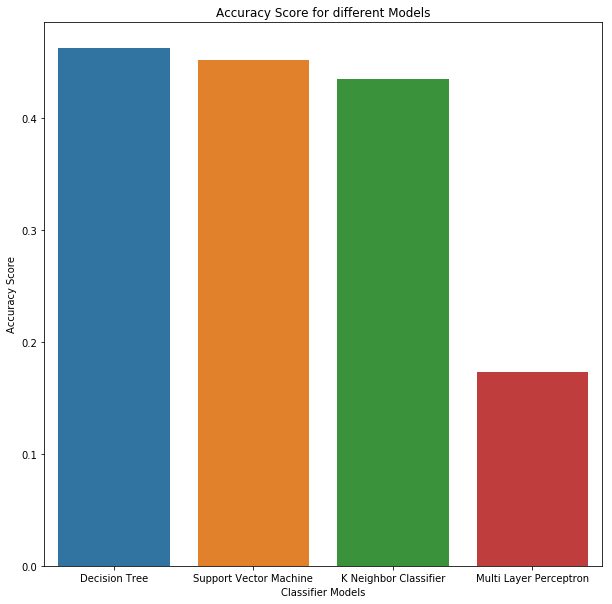

In [64]:
###Accuracy Score comparision of different Models (Visualization)

x = ["Decision Tree","Support Vector Machine","K Neighbor Classifier","Multi Layer Perceptron"]

y = np.array([score_mean_dtree,score_mean_svm,score_mean_kN,score_mean_mlp])

fig, ax = plt.subplots(figsize=(10,10))
sb.barplot(x,y)
plt.ylabel("Accuracy Score")
plt.xlabel("Classifier Models")
plt.title("Accuracy Score for different Models")
plt.show()

In [65]:
#Accuracy of different model
classifier = ['Decision Tree' , 'Support Vector Machine' ,'K Neighbor Classifier', 'Multi Layer Perceptron']
score = np.array([score_mean_dtree,score_mean_svm,score_mean_kN,score_mean_mlp])
a=0
index=0

for pred in range(len(Models)):
    if a < score[pred-1]:
        a = score[pred-1]
        index=pred-1
    print("accuracy of {} Models is {:.2f}%".format(classifier[pred-1],score[pred-1]*100))
    
print("\nBest Classifier Model is {} and the accuracy is {:.2f}%".format(classifier[index],a*100))


accuracy of Multi Layer Perceptron Models is 17.31%
accuracy of Decision Tree Models is 46.23%
accuracy of Support Vector Machine Models is 45.19%
accuracy of K Neighbor Classifier Models is 43.47%

Best Classifier Model is Decision Tree and the accuracy is 46.23%


To improve accuracy of model, I have used bagging classifier.I have tuned the Bagging Classifier Model for more accuracy.

In [66]:
##Ensemble Learning to improve accuracy of model

##Tuning Model

from sklearn.ensemble import BaggingClassifier
from sklearn import tree

sample_leaf_options = [200,500,600,800,1000]

for leaf_size in sample_leaf_options:
    model = BaggingClassifier(tree.DecisionTreeClassifier(max_features="auto", max_leaf_nodes= leaf_size, random_state=1))
    model.fit(X_train, y_train)
    y_pred_bagging=model.predict(X_test)
    scores = cross_val_score(model,X_data_frame_smote,y_data_frame_smote, cv=5)
    score_mean_bagging = scores.mean()
    
    print('leaf size = ',leaf_size)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print(" ")





C:\Users\shree\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shree\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shree\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shree\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

leaf size =  200
Accuracy: 0.47 (+/- 0.08)
 
leaf size =  500
Accuracy: 0.48 (+/- 0.10)
 


C:\Users\shree\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shree\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shree\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shree\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

leaf size =  600
Accuracy: 0.49 (+/- 0.11)
 
leaf size =  800
Accuracy: 0.47 (+/- 0.10)
 


C:\Users\shree\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shree\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shree\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shree\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

leaf size =  1000
Accuracy: 0.47 (+/- 0.11)
 


C:\Users\shree\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shree\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### By applying Machine Learning Algorithm, for classification of movie into different categories, it is seen that Decision Tree model is the best fitted model. By applying ensemble algorithm we were able to increase accuracy by 3%.  This is achieved by keeping leaf size 500 which is very high and will impact the performace for large dataset. So we are choosing decision model as our predictive model.

We have to apply this model for scoring sheet data. For scoring sheet data we have observed that we have all the data dimensions which are required for classification except total. Since total is an important parameter which is directly impacting classification, we cannot ignore this field. Total is highly correlated iwth category. So to solve this problem, we will build sub model (Linear regression model to find total parameter for scoring sheet).

In [67]:
#Importing scoring sheet

scoring_sheet = pd.read_csv('Scoring Sheet.csv')

scoring_sheet.head()

,id,name,display_name,production_budget,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name
0,7970115,"Avengers, The (2011)",Marvel's The Avengers,225000000,2012,0,Super Hero,Based on Comic/Graphic Novel,Live Action,Adventure,English,for intense sequences of sci-fi violence and a...,PG-13,Wide
1,174540115,Dark Knight Rises The,The Dark Knight Rises,0,2012,1,Super Hero,Based on Comic/Graphic Novel,Live Action,Action,English,"for intense sequences of violence and action, ...",PG-13,Wide
2,149080115,Bond 23,Skyfall,200000000,2012,1,Contemporary Fiction,Based on Fiction Book/Short Story,Live Action,Action,English,"for intense violent sequences throughout, some...",PG-13,Wide
3,136020115,Twilight Saga Breaking Dawn Part 2 The,"The Twilight Saga: Breaking Dawn, Part 2",136200000,2012,1,Fantasy,Based on Fiction Book/Short Story,Live Action,Drama,English,for sequences of violence including disturbing...,PG-13,Wide
4,53500115,"Hobbit, The",The Hobbit: An Unexpected Journey,270000000,2012,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for extended sequences of intense fantasy acti...,PG-13,Wide


In [68]:
X_scoring_test = scoring_sheet.drop(columns=['id','name','display_name','production_budget'])

X_scoring_test.head()

,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name
0,2012,0,Super Hero,Based on Comic/Graphic Novel,Live Action,Adventure,English,for intense sequences of sci-fi violence and a...,PG-13,Wide
1,2012,1,Super Hero,Based on Comic/Graphic Novel,Live Action,Action,English,"for intense sequences of violence and action, ...",PG-13,Wide
2,2012,1,Contemporary Fiction,Based on Fiction Book/Short Story,Live Action,Action,English,"for intense violent sequences throughout, some...",PG-13,Wide
3,2012,1,Fantasy,Based on Fiction Book/Short Story,Live Action,Drama,English,for sequences of violence including disturbing...,PG-13,Wide
4,2012,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for extended sequences of intense fantasy acti...,PG-13,Wide


In [69]:
#Converting Categorical features into numerical features

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

X_scoring_test['creative_type'] = lb_make.fit_transform(X_scoring_test['creative_type'])
X_scoring_test['source'] = lb_make.fit_transform(X_scoring_test['source'])
X_scoring_test['production_method'] = lb_make.fit_transform(X_scoring_test['production_method'])
X_scoring_test['genre'] = lb_make.fit_transform(X_scoring_test['genre'])
X_scoring_test['language'] = lb_make.fit_transform(X_scoring_test['language'])
X_scoring_test['movie_board_rating_display_name'] = lb_make.fit_transform(X_scoring_test['movie_board_rating_display_name'])
X_scoring_test['movie_release_pattern_display_name'] = lb_make.fit_transform(X_scoring_test['movie_release_pattern_display_name'])

X_scoring_test.head()

,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name
0,2012,0,7,0,2,1,0,for intense sequences of sci-fi violence and a...,3,5
1,2012,1,7,0,2,0,0,"for intense sequences of violence and action, ...",3,5
2,2012,1,0,2,2,0,0,"for intense violent sequences throughout, some...",3,5
3,2012,1,3,2,2,5,0,for sequences of violence including disturbing...,3,5
4,2012,1,3,2,0,1,0,for extended sequences of intense fantasy acti...,3,5


In [70]:
###Converting text into categories of sentiments

from textblob import TextBlob

reviews = X_scoring_test.iloc[:,7]

i=0;

for review in reviews:
    text = TextBlob(review)
    polarity=text.sentiment.polarity
    
    #positive to negative reaction (classification goes from 1 to 5)
    if polarity>0.5 and polarity<1.0:
        X_scoring_test.loc[i,'board_rating_reason'] = 1
    elif polarity>0.2 and polarity<0.5:
        X_scoring_test.loc[i,'board_rating_reason'] = 2
    elif polarity>0.0 and polarity<0.2:
        X_scoring_test.loc[i,'board_rating_reason'] = 3
    elif polarity>-0.05 and polarity<-0.1:
        X_scoring_test.loc[i,'board_rating_reason'] = 5
    else:
        X_scoring_test.loc[i,'board_rating_reason'] = 4
    
    i = i+1

    
X_scoring_test.head()

,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name
0,2012,0,7,0,2,1,0,2,3,5
1,2012,1,7,0,2,0,0,3,3,5
2,2012,1,0,2,2,0,0,4,3,5
3,2012,1,3,2,2,5,0,4,3,5
4,2012,1,3,2,0,1,0,4,3,5


In [71]:
#Since Decision Tree Classifier is the best fitted model, we will use that model to predict the category based on scoring sheet.

# Import decision tree
from sklearn.tree import DecisionTreeClassifier

# Build a decision tree model
dtree = DecisionTreeClassifier()

# Train the model
dtree = dtree.fit(X_train, y_train)

#Predicting ourtcome on dataset

y_pred_dtree = dtree.predict(X_scoring_test)

print(y_pred_dtree)

Models.append(y_pred_dtree)



[8 8 7 7 7 8 8 9 8 9 8 8 2 9 8 7 7 2 8 8 8 2 8 9 8 8 5 7 5 8 8 8 7 5 8 8 4
 8 7 8 8 5 7 8 5 8 8 8 8 5 8 5 2 8 6 5 5 8 6 9 2 8 8 2 2 7 8 8 8 8 8 8 2 8
 7 2 2 5 8 8 8 8 5 2 8 2 8 5 8 8 8]


In [72]:
#Converting in Dataframe
y_prediction = pd.DataFrame(y_pred_dtree)

y_prediction.columns = ["Category"]

print(y_prediction)

    Category
0          8
1          8
2          7
3          7
4          7
5          8
6          8
7          9
8          8
9          9
10         8
11         8
12         2
13         9
14         8
15         7
16         7
17         2
18         8
19         8
20         8
21         2
22         8
23         9
24         8
25         8
26         5
27         7
28         5
29         8
..       ...
61         8
62         8
63         2
64         2
65         7
66         8
67         8
68         8
69         8
70         8
71         8
72         2
73         8
74         7
75         2
76         2
77         5
78         8
79         8
80         8
81         8
82         5
83         2
84         8
85         2
86         8
87         5
88         8
89         8
90         8

[91 rows x 1 columns]


In [73]:
##Appending prediction in scoring sheet

scoring_sheet_prediction = scoring_sheet.join(y_prediction)

scoring_sheet_prediction.head()

,id,name,display_name,production_budget,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,Category
0,7970115,"Avengers, The (2011)",Marvel's The Avengers,225000000,2012,0,Super Hero,Based on Comic/Graphic Novel,Live Action,Adventure,English,for intense sequences of sci-fi violence and a...,PG-13,Wide,8
1,174540115,Dark Knight Rises The,The Dark Knight Rises,0,2012,1,Super Hero,Based on Comic/Graphic Novel,Live Action,Action,English,"for intense sequences of violence and action, ...",PG-13,Wide,8
2,149080115,Bond 23,Skyfall,200000000,2012,1,Contemporary Fiction,Based on Fiction Book/Short Story,Live Action,Action,English,"for intense violent sequences throughout, some...",PG-13,Wide,7
3,136020115,Twilight Saga Breaking Dawn Part 2 The,"The Twilight Saga: Breaking Dawn, Part 2",136200000,2012,1,Fantasy,Based on Fiction Book/Short Story,Live Action,Drama,English,for sequences of violence including disturbing...,PG-13,Wide,7
4,53500115,"Hobbit, The",The Hobbit: An Unexpected Journey,270000000,2012,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for extended sequences of intense fantasy acti...,PG-13,Wide,7


In [74]:
###writing CSV file

scoring_sheet_prediction.to_csv('scoring sheet prediction.csv')

